# Final Project

## 移除不必要的警告

In [2]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

### 獲取歷史資料

In [3]:
from finlab.data import Data
from finlab.ml import fundamental_features
fdf = fundamental_features()

data = Data()

close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

PB = data.get("股價淨值比")
pe = data.get("本益比")

#close = data.get_adj("收盤價").round(2)

#財務指標
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

#t123 = data.get('土地')

#bargin_i=data.get("投信買賣超股數")
#bargin_f=data.get("外資自營商買賣超股數")
#bargin_s=data.get("自營商買賣超股數(自行買賣)")
#

rev.index = rev.index.shift(5, "d")         #每月頻率
#周頻率

### 計算features

In [4]:
#MFI  = data.talib("MFI")
##MFI.tail()

In [5]:
#ub,mb,lb =data.talib("BBANDS")

In [6]:
##############################################　　　自己加入的　　　##############################################
import pandas as pd
from finlab.__init__ import talib_all_stock
from talib import abstract

#### 營收相關

In [7]:
##########################

In [8]:
from finlab.ml import fundamental_features

df1 = fundamental_features()

In [9]:
##########################

In [10]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1


features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
###############################################
    'yoy': yoy(1),
    'delta_yoy':(yoy(1)/yoy(2))-1,
    
    'PB':PB,
    'PE':pe,       
}


In [11]:
mom(1).unstack()

stock_id  date      
1101      2005-02-15         NaN
          2005-03-15         NaN
          2005-04-15    0.570159
          2005-05-15    1.599304
          2005-06-15    0.965557
                          ...   
9962      2023-01-15    1.004024
          2023-02-15    1.249495
          2023-03-15    0.729045
          2023-04-15    1.110722
          2023-05-15    1.020832
Length: 446160, dtype: float64

#### 財報指標

#### 技術指標

In [12]:
# https://zhuanlan.zhihu.com/p/342075180 talib函数功能一览表

def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)


def bi_(n):
    return (bargin_i / vol.shift(1)).shift(n)

def bf(n):
    return (bargin_f / vol.shift(1)).shift(n)
    
def bs(n):
    return (bargin_s / vol.shift(1)).shift(n)

def rsi(n):
    #return talib_all_stock(ndays=10000, func=abstract.RSI, timeperiod=n)
    return data.talib("RSI",timeperiod=n)

def MFI(n):
    return data.talib("MFI",timeperiod=n)

def obv(n):
    return data.talib("OBV",timeperiod=n)



features = {
    
#    'ATR14':data.talib("ATR",timeperiod=14),
#    'NATR14':data.talib('NATR',timeperiod=14),
#    'TRANGE':data.talib('TRANGE'),
#    'Adosc3':data.talib('ADOSC',timeperiod=3),
    
#    "MFI5":MFI(5),
#    "MFI10":MFI(10),

#    'rsi6': rsi(6),  #DataFrame
#    'rsi10': rsi(10),  #DataFrame
#    'rsi14': rsi(14),  #DataFrame
#    'rsi20': rsi(20),  #DataFrame
#    'rsi50': rsi(50),  #DataFrame
#   
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
#    'yoy': yoy(1),
#    'delta_yoy':(yoy(1)/yoy(2))-1,
    
#    'ff':ff,
    'PB':PB,
    'PE':pe,   
#  
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
}


#### 確認各指標清單

In [13]:
list1=sorted(features)
list1

['PB',
 'PE',
 'acc10',
 'acc120',
 'acc20',
 'acc240',
 'acc5',
 'acc60',
 'bias10',
 'bias120',
 'bias20',
 'bias240',
 'bias5',
 'bias60',
 'mom1',
 'mom2',
 'mom3',
 'mom4',
 'mom5',
 'mom6',
 'mom7',
 'mom8',
 'mom9',
 'rsv10',
 'rsv120',
 'rsv20',
 'rsv240',
 'rsv5',
 'rsv60']

In [14]:
#t1 = data.talib("NATR",timeperiod=14)
#t1.to_csv('myfile.csv')

### 製作dataset

##### 設定買賣頻率

In [15]:
#rev.index = rev.index.tz_localize("Asia/Taipei")
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-08-15', '2022-09-15', '2022-10-15', '2022-11-15',
               '2022-12-15', '2023-01-15', '2023-02-15', '2023-03-15',
               '2023-04-15', '2023-05-15'],
              dtype='datetime64[ns]', name='date', length=220, freq=None)

#### 將dataframe 組裝起來

In [16]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [17]:

for name, f in features.items():
    features[name] = f.unstack()

In [18]:
import pandas as pd
dataset = pd.DataFrame(features)

In [19]:
feature_names = list(dataset.columns)

In [20]:
##############################################　　　自己加入的　　　##############################################
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])


#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

### 新增 label

In [21]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

### 刪除太大太小的歷史資料

In [22]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset , list1 , thresh=0.01)

print(dataset_drop_extreme_case.shape)

(453200, 31)
(393633, 31)


In [23]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [24]:
dataset_drop_extreme_case.index.get_level_values("date")

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-08-15', '2022-09-15', '2022-10-15', '2022-11-15',
               '2022-12-15', '2023-01-15', '2023-02-15', '2023-03-15',
               '2023-04-15', '2023-05-15'],
              dtype='datetime64[ns]', name='date', length=393633, freq=None)

In [25]:
##############################################　　　自己加入的　　　##############################################

dataset_dropna.index = pd.to_datetime(dataset_dropna.index)
dataset_dropna = dataset_dropna.sort_index()

#修復＜class ‘numpy.ndarray‘＞　https://blog.csdn.net/lxbin/article/details/114005757

In [26]:
dataset_train = dataset_dropna[:'2020']
dataset_test = dataset_dropna['2021':]

### 神經網路模型

In [27]:
##############################################　　　自己加入的　　　##############################################


#pip3 install --upgrade protobuf==3.20.1 --user
#
#python AssertionError: ＜class ‘numpy.ndarray‘＞
#
#If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
#
#https://github.com/SeldonIO/MLServer/issues/615

In [28]:
### 1. Downgrade the protobuf package to 3.20.x or lower.
##卸载protobuf
#!pip uninstall protobuf
##安装低版本protobuf
#!pip install protobuf==3.19.0

#### keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

import os


os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train['rank'],
                    batch_size=1000,         #1000  #每一个batch的大小
                    epochs=225, #225          #迭代次数
                    verbose=1,
                    validation_split=0.1,
                    #validation_data =        #(测试集的输入特征，测试集的标签），
                    #validation_split =       # 从测试集中划分多少比例给训练集，
                    #validation_freq = 20        #测试的epoch间隔数                     
                   )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3000      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13,201
Trainable params: 13,201
Non-trainable params: 0
_________________________________________________________________
start fitting
Epoch 1/225
103/103 [==============================] - 1s 5ms/step - loss: 0.1346 - val_loss: 0.0712
Epoch 2/225
103/103 [==============================] - 0s 3ms/step - 

##### 結果

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

#### lightgbm Model

In [31]:
import lightgbm as lgb

cf = lgb.LGBMRegressor(colsample_bytree=0.8626313651274391, metric='None',
                       min_child_samples=468, min_child_weight=0.01, n_estimators=5000,
                       n_jobs=4, num_leaves=33, random_state=314, reg_alpha=7,
                       reg_lambda=0.1, subsample=0.7272577195782406)

In [32]:
##############################################　　　自己加入的　　　##############################################

train = dataset_train[feature_names] , dataset_train['return'] > 1
test = dataset_test[feature_names] , dataset_test['return'] > 1 

print('---cf.fit---')
print(cf.fit(*train))
print('---cf.score---')
print(cf.score(*test))
print('---predict---')
print(cf.predict(test[0]))

---cf.fit---
LGBMRegressor(colsample_bytree=0.8626313651274391, metric='None',
              min_child_samples=468, min_child_weight=0.01, n_estimators=5000,
              n_jobs=4, num_leaves=33, random_state=314, reg_alpha=7,
              reg_lambda=0.1, subsample=0.7272577195782406)
---cf.score---
-0.09480265275839073
---predict---
[ 0.35360955  0.78930787  0.33887128 ... -0.02361679  0.38432127
  0.15392988]


In [33]:
#import lightgbm as lgb
cf = lgb.LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
               min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
               n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
               reg_lambda=10, subsample=0.4643892520208455)
    
cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
              min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
              n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
              reg_lambda=10, subsample=0.4643892520208455)

#### Random Forest Model

In [34]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])  

RandomForestRegressor()

##### Split Train Test dataset

<Axes: xlabel='Value', ylabel='Feature'>

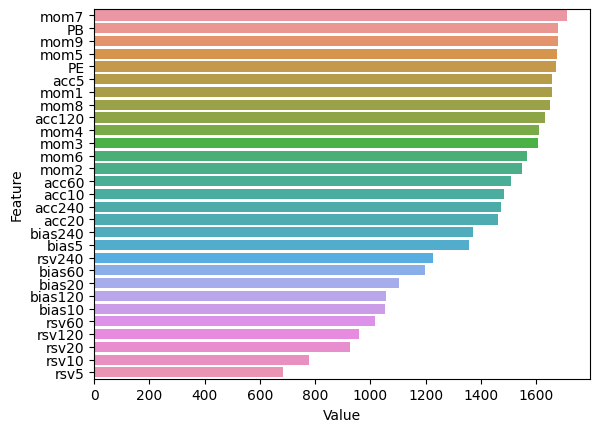

In [35]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [36]:
select = dataset.index.get_level_values('date') < '2021'
dataset_train = dataset[select]
dataset_test = dataset[~select]

### Ensemble learning

In [37]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

5187/5187 [==============================] - 9s 2ms/step


## backtest

<Axes: xlabel='date'>

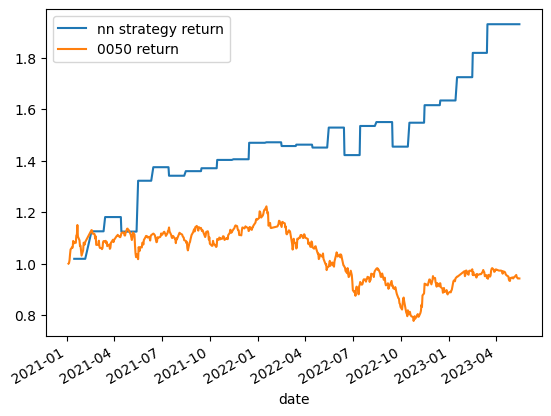

In [38]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time , list1 , thresh=0.01)
    
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates)['2021':].cumprod()

s0050 = close['0050']['2021':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



In [39]:
#import pickle
#
#return_history_1026 = pd.Series(rs, index=dates)['2021':].cumprod()
##eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()
#
#pickle.dump(rs, open('return_history_1026.pkl', 'wb'))

In [40]:
#import pyfolio as pf
#import pandas as pd
#
#close.index = close.index.tz_localize("Asia/Taipei")
##pf.create_returns_tear_sheet(close['0050'].pct_change())
#
## 得到 上一個單元的 回測結果
#ret = pickle.load(open("return_history_1026.pkl", "rb"))
#
## 將回測報酬率取出來
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
#
## 利用pyfolio 比較報酬率
#pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

### 當月持股狀況

In [41]:
dataset.index.levels[1]

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-08-15', '2022-09-15', '2022-10-15', '2022-11-15',
               '2022-12-15', '2023-01-15', '2023-02-15', '2023-03-15',
               '2023-04-15', '2023-05-15'],
              dtype='datetime64[ns]', name='date', length=220, freq=None)

34/34 [==============================] - 0s 2ms/step


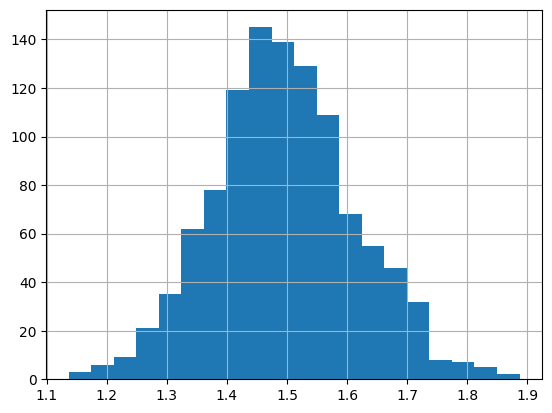

In [42]:
# get the latest dataset
last_date = "2022-10-15"#dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, list1 , thresh=0.01)


# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
slist1 = rank[condition].reset_index()['stock_id']

#https://keras-cn.readthedocs.io/en/latest/models/model/

## 平均分配資產於股票之中

In [43]:
close = data.get("收盤價")

money = 60000
stock_prices = close[rank[condition].reset_index()['stock_id']].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


股票平分張數:


stock_id
1236    0.128205
1339    0.069124
1587    0.134529
2426    0.169492
2640    0.023529
2890    0.177515
3545    0.040377
3605    0.107143
3679    0.032680
4303    0.157068
4543    0.110092
4912    0.043353
5278    0.016043
5299    0.023904
6123    0.044183
6176    0.026432
6184    0.059289
6754    0.055351
8155    0.022388
8234    0.075758
Name: 2023-05-15 00:00:00, dtype: float64